# 1. import libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('seaborn-white')
plt.rcParams['figure.figsize'] = 10,5

---
# 2. import dataset

In [3]:
df = pd.read_csv('clean.csv')
df.shape

(300, 5)

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,300.0,2016.500000,1.710679,2014.00000,2015.000000,2016.500000,2018.000000,2019.00000
alzheimer_death_rate,300.0,0.022815,0.025991,0.00068,0.005945,0.016720,0.027937,0.16859
cancer_death_rate,300.0,0.119243,0.120036,0.00922,0.033655,0.087865,0.142360,0.59962
obesity_rate,300.0,0.321939,0.037831,0.23800,0.295000,0.322469,0.348000,0.40800


---
# 3. correl

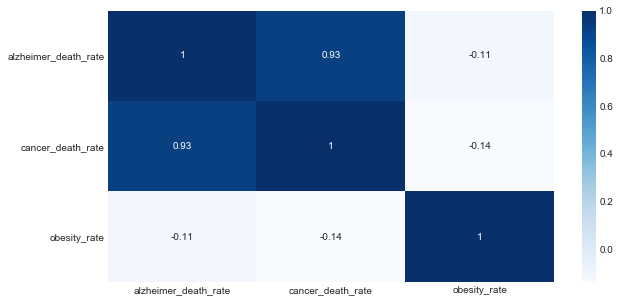

In [5]:
df1 = df.drop(['YEAR', 'STATE'], axis=1)
sns.heatmap(df1.corr(),cmap="Blues",annot = True);

---
# 4. scatter plot

Text(0, 0.5, 'cancer_death_rate')

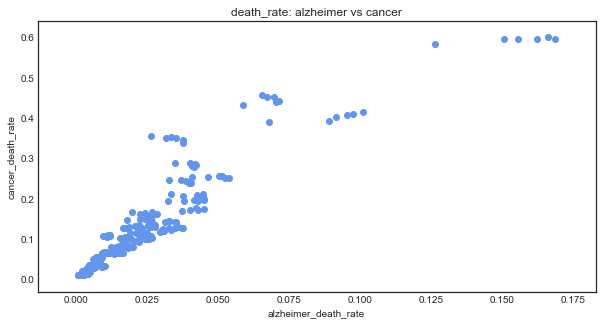

In [6]:
plt.scatter(df1['alzheimer_death_rate'], df1['cancer_death_rate'], color='cornflowerblue')
plt.title('death_rate: alzheimer vs cancer')
plt.xlabel('alzheimer_death_rate')
plt.ylabel('cancer_death_rate')

---
# 5. Year over Year

In [7]:
df2 = df.groupby('YEAR').agg({'STATE':'count','alzheimer_death_rate':'mean','cancer_death_rate':'mean'}).reset_index()
df2.index = df2['YEAR']
df2.shape

(6, 4)

Text(0, 0.5, 'cancer_death_rate')

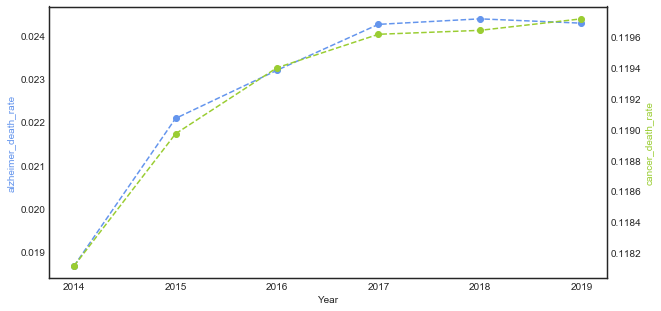

In [8]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(df2['alzheimer_death_rate'], color='cornflowerblue', ls='--', marker='o', label='alzheimer_death_rate')
ax2.plot(df2['cancer_death_rate'], color='yellowgreen', ls='--', marker='o', label='cancer_death_rate')

ax1.set_xlabel('Year')
ax1.set_ylabel('alzheimer_death_rate', color='cornflowerblue')
ax2.set_ylabel('cancer_death_rate', color='yellowgreen')